In [1]:
import os
import sys
#NOTE I NEED THIS FOR WINDOWS
sys.path.append("..")
import plotters
import reader
from DataTransformer import DataTransformer

%load_ext autoreload
%autoreload 2

os.chdir('../') # work from project root so the reader gets the right paths
print(os.getcwd())

c:\Users\aceas\Documents\School\Distributed Systems\plotterzz


In [2]:
included_data = ["Min-Min"]
data = reader.sort_dfs(included_data)
transformer = DataTransformer(data)

# ECDF for makespan

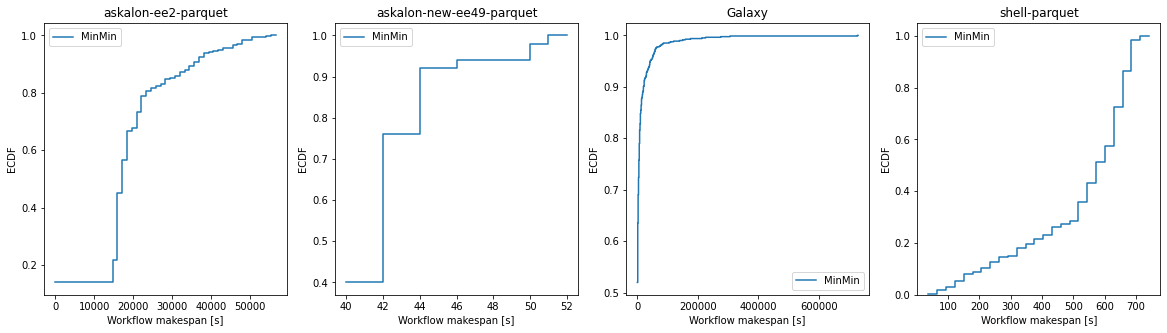

In [3]:
ecdf_data, ecdf_meta = transformer.to_makespan_cdf_per_workflow("homogeneous", "scale2", "exp_workload_ecdf.png")

plotters.create_makespan_cdf_order_policy(ecdf_data, ecdf_meta) # although created for exp 1, this works here just fine :)

# Electricity

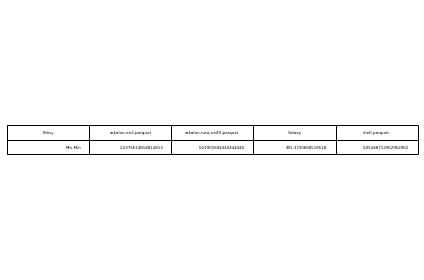

In [4]:
electricity_data, electricity_meta = transformer.to_energy_exp_workload("scale2", "homogeneous","exp_workload_electricity.png")

electricity_data

plotters.create_energy_per_workload(electricity_data, electricity_meta, included_data)

# Utilization

In [5]:
utilization_data, utilization_meta = transformer.to_utilization_table_workload("homogeneous", "scale2", "exp_workload_utilization.png")

utilization_data

,policy,askalon-ee2-parquet,askalon-new-ee49-parquet,Galaxy,shell-parquet
0,MinMin,0.783155,0.012459,0.001043,0.724333


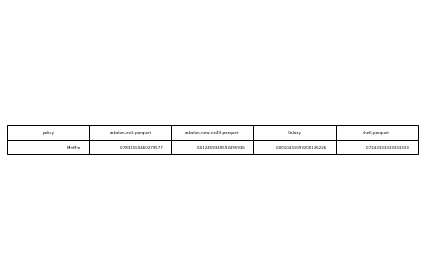

In [6]:
plotters.create_usage_table_per_env(utilization_data, utilization_meta)